# Machine Learning
## Part II

Our task is to predict diabetes occurence in a population of Pima Indian heritage. We are given a set of diagnostic measurement in the dataset


In [1]:
# Load libraries
# !pip install six
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from six import StringIO  # in place of StringIO
from sklearn.tree import export_graphviz
import pydotplus
# from io import StringIO  # Use io.StringIO directly. No longer supported in versions python 2.4 +
from PIL import Image  # Use PIL or IPython.display.Image for Jupyter Notebooks
from IPython.display import Image  # Optional, for Jupyter



### Load diabetes data
Pima Indians Diabetes Database from [kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download)
We will follow the tutorial from [Data camp](https://www.datacamp.com/tutorial/decision-tree-classification-python)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
gdrive='drive/MyDrive/SJSU/SJSU_Fall2024/CS133_Data-Visualization/week12_ml/'
fp=gdrive+'diabetes.csv'

Mounted at /content/drive


In [3]:
pima = pd.read_csv(fp)
pima.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Select features and split the data
**Feature selection**  
Divide given columns into two types of variables dependent(or target variable) and independent variable (or feature variables).

**Splitting Data**  
To understand model performance, dividing the dataset into a training set and a test set is a good strategy. Typically when we select a random set of instances for our model we wil randomly select 20% of our dataset. We set this 20% aside for out test set and train on the remaining 80%.

It is important that the training and test split contain known output from which the model can learn off of. The test set then tests the model's prediction based on what it learned from the training set.

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.

In [4]:
### Select features and target variables
# pima.columns
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

### Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test


### Pre-processing and feature engineering

**Replacing null or zero values**
While this dataset did not have any null values we did see a number of zero values. One of the ways we can address this is to replace those zero values which may be missing values for some of the columns.

**Feature Engineering**  
Another pre-processing task that we can do is feature engineering. An example of that would be to code our data into a numberical vector, where you convert categorical variables to a numerial variable. We do this because many ML algorirthm requires a numerical input.

In [5]:
### Filter out columns with zero
zero_cols = []
for col in pima.columns:
  zero_count = (pima[col] == 0).sum()
  # make a list of columns with zero counts > 0
  if zero_count > 0:
    zero_cols.append(col)

### Drop the two columns to not include in independent variables
zero_cols.remove('Pregnancies')
zero_cols.remove('Outcome')

# Apply median replacement to X_train and X_test
pima_X_train_processed = X_train.copy()
pima_X_test_processed = X_test.copy()

for col in zero_cols:
    median_val = pima[pima[col] != 0][col].median() # Calculate median from original pima data
    pima_X_train_processed[col] = pima_X_train_processed[col].replace(0, median_val)
    pima_X_test_processed[col] = pima_X_test_processed[col].replace(0, median_val)

print("Zero values replaced in X_train_processed and X_test_processed.")

Zero values replaced in X_train_processed and X_test_processed.


In [6]:
# ### Create a new column to label age group
# pima_X_train_processed['Age_Group'] = pd.cut(pima_X_train_processed['Age'], bins=[0, 30, 40, 50, 100],
#                                     labels=['Young', 'Middle', 'Senior', 'Elderly'])

# ## ML has difficulty processing categorical attribute, so convert it to numeric
# pima_X_train_processed['Age_Group'] = pima_X_train_processed['Age_Group'].cat.codes

# pima_X_test_processed['Age_Group'] = pd.cut(pima_X_test_processed['Age'], bins=[0, 30, 40, 50, 100],
#                                     labels=['Young', 'Middle', 'Senior', 'Elderly'])
# pima_X_test_processed['Age_Group'] = pima_X_test_processed['Age_Group'].cat.codes

# Regressor models

## Multiple linear regression model
We will look at more than one independent variable and one dependent variable. The goal is to find the best fit line equation that can predict the values based on the independent variables. In regression we are trying to find the value of y using a function that predicts continuous y given a set of independent features.

There are no real hyperparams for plain LinearRegression. We can do feature engineering such as normalizing using `StandardScaler`.


In [7]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(pima_X_train_processed, y_train)

## predict y values
diabetes_predictions = lin_reg.predict(pima_X_test_processed)
print("Multiple linear regression score:", lin_reg.score(pima_X_test_processed, y_test))
print("Slope (Coefficient):", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)


Multiple linear regression score: 0.362559610240763
Slope (Coefficient): [ 0.02018959  0.00648605 -0.00175109 -0.00044662 -0.00014969  0.01551709
  0.11383893  0.00214503]
Intercept: -0.9846536516508573


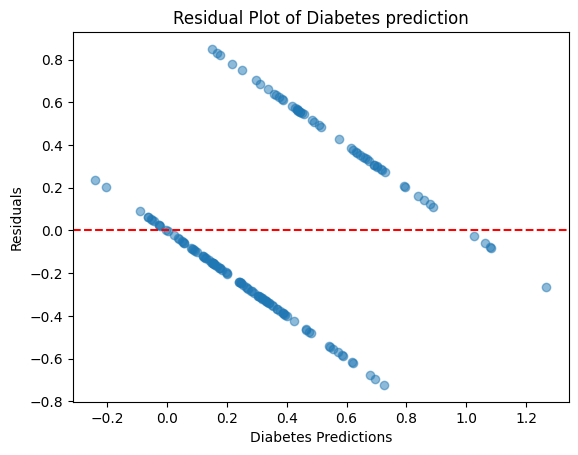

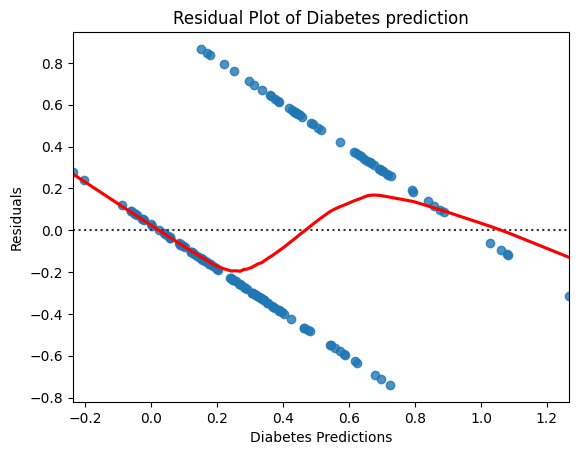

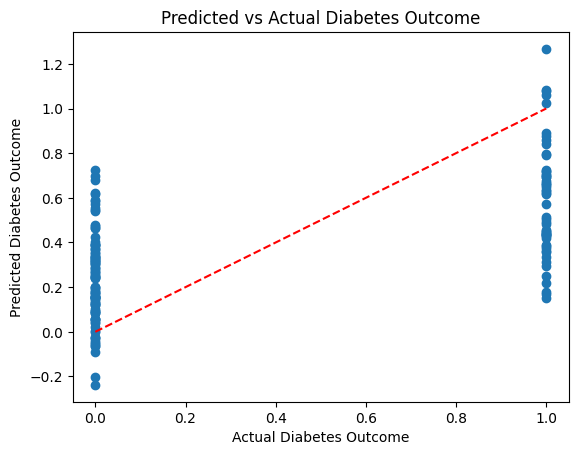

In [8]:
### Visualize the regression line
## Residual plot
residuals = y_test - diabetes_predictions
plt.scatter(diabetes_predictions, residuals, alpha=0.5)
plt.xlabel('Diabetes Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot of Diabetes prediction')
plt.show()

sns.residplot(x=diabetes_predictions, y=y_test-diabetes_predictions, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Diabetes Predictions')
plt.ylabel('Residuals')
plt.title('Residual Plot of Diabetes prediction')
plt.show()

## Predicted vs Actual plot
plt.scatter(y_test, diabetes_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Diabetes Outcome')
plt.ylabel('Predicted Diabetes Outcome')
plt.title('Predicted vs Actual Diabetes Outcome')
plt.show()

In [9]:
### Model evaluation
print("Linear Regression Mean Squared Error:", mean_squared_error(y_test, diabetes_predictions))
print("Linear Regression R-squared:", r2_score(y_test, diabetes_predictions))

Linear Regression Mean Squared Error: 0.1463511098937023
Linear Regression R-squared: 0.362559610240763


**Evaluating model**   
The multiple linear regression model is evaluated using Mean Squared Error and R-squared.  

Mean Squared Error (MSE) measures the squared difference between the predicted and actual values of the target variable. The MSE is 0.1463511098937023 and a lower MSE indicates better model performance that is making more accurate predictions.

R-squared is a statistical measure that represents the proportion of the variance for the target variable that is explained by an independent variables. A R2 of 0.362559610240763 indicates the 36.26% of the variance in the target variable can be explained by the independent variables used in the model.

### Decision tree
**Building Decision Tree Model**  
Let's create a decision tree model using Scikit-learn.

In [10]:
### Create Decision Tree classifer object
clf = DecisionTreeClassifier()

### Train Decision Tree Classifer
clf = clf.fit(pima_X_train_processed, y_train)

#Predict the response for test dataset
y_pred = clf.predict(pima_X_test_processed)

**Evaluating the Model**  
Let's estimate how accurately the classifier or model can predict the type of cultivars. Accuracy can be computed by comparing actual test set values and predicted values.
  
Accuracy found classification rate of 70.12%, which is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree algorithm.

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7207792207792207


**Visualizing Decision Trees**  
You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook.

Steps:
1.   Created a StringIO object called dot_data to hold the text representation of the decision tree.
2.   Exported the decision tree to the dot format using the export_graphviz function and write the output to the dot_data buffer.
3.  Created a pydotplus graph object from the dot format representation of the decision tree stored in the dot_data buffer.
4.  Written the generated graph to a PNG file named "diabetes.png".
5.  Displayed the generated PNG image of the decision tree using the Image object from the IPython.display module.



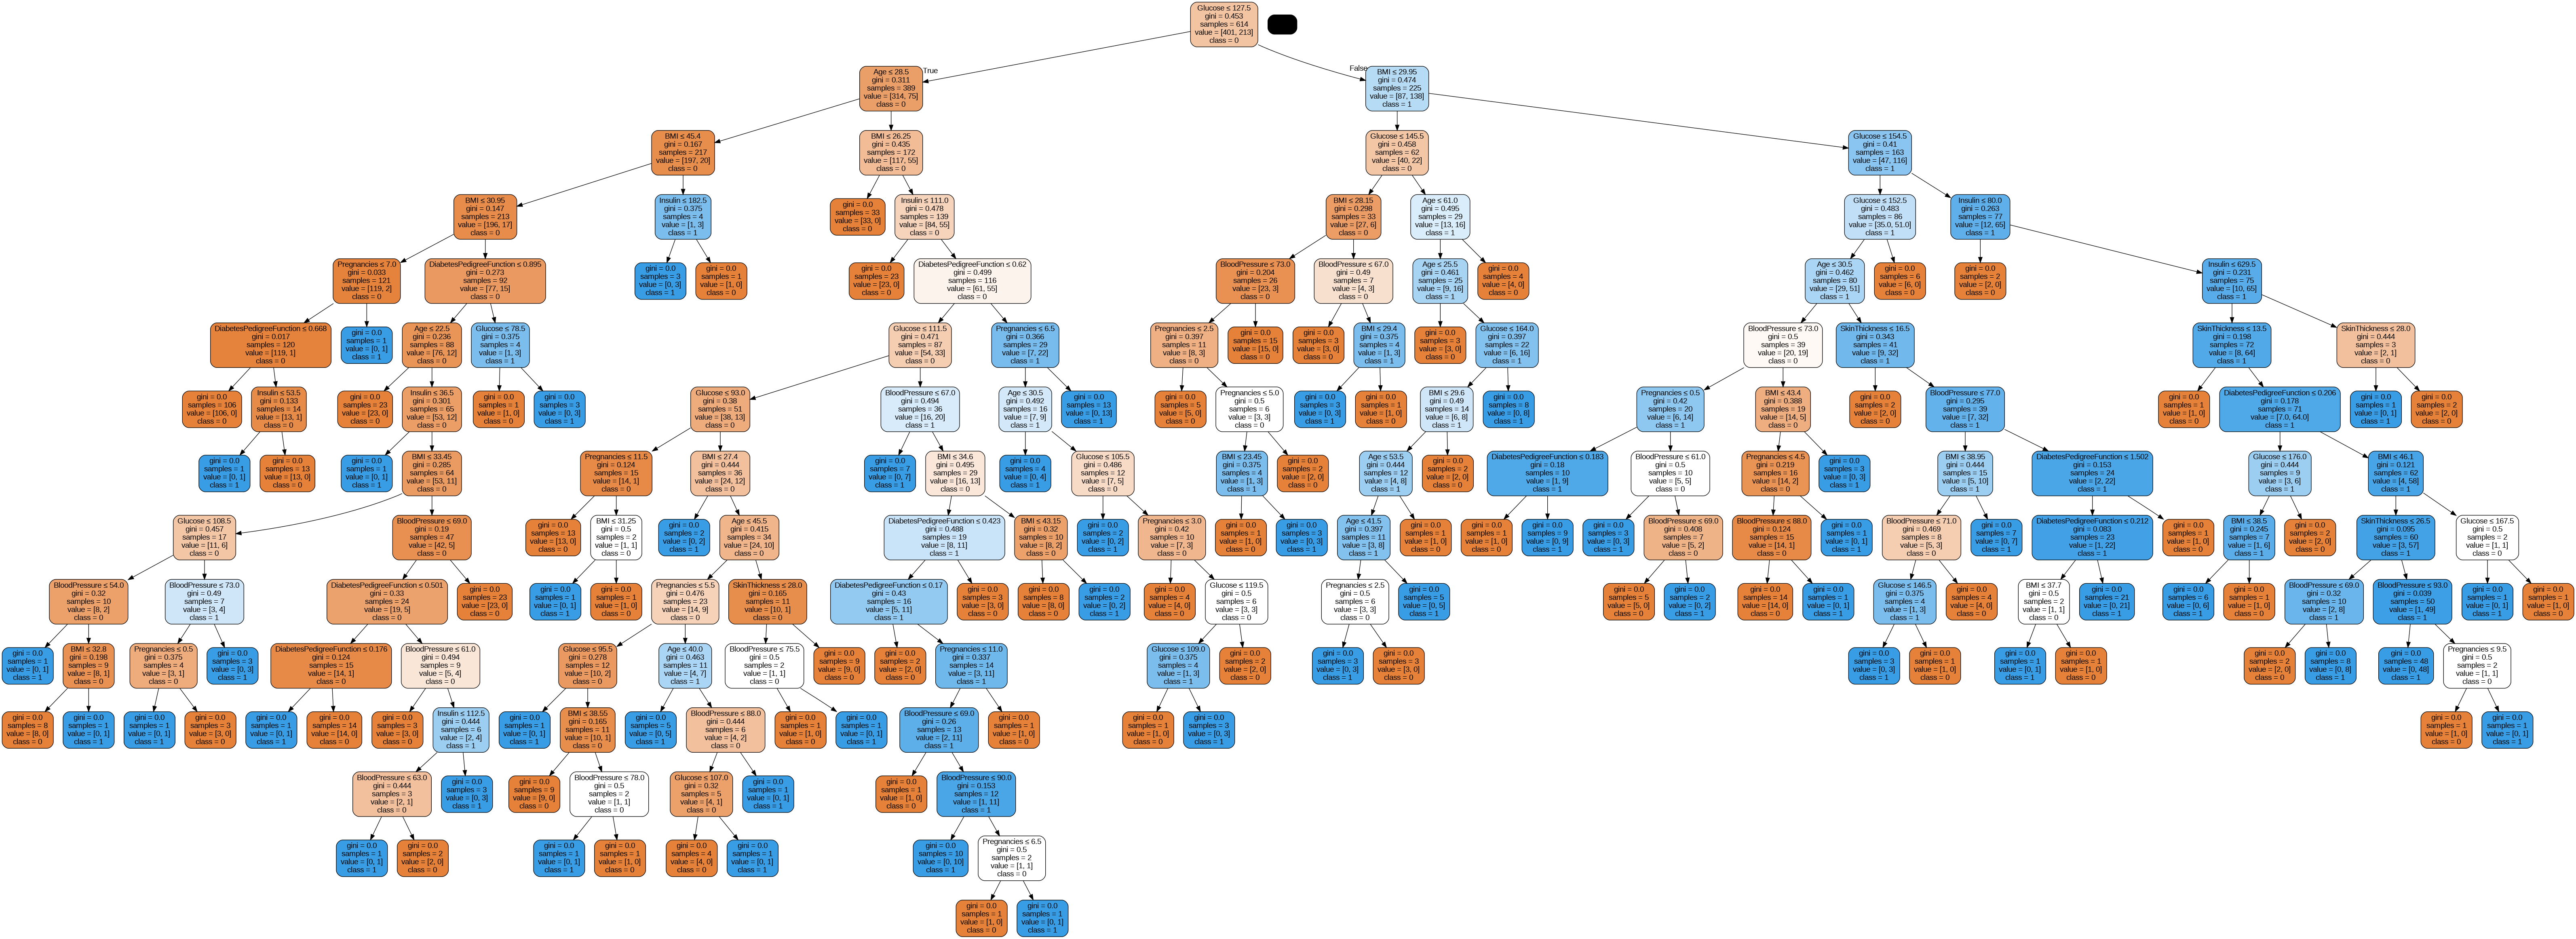

In [12]:
# Assuming clf is your trained classifier and feature_cols is a list of feature names
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])

# Create graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the graph as a PNG file
graph.write_png('diabetes.png')

# Display the image
Image(filename='diabetes.png')  # For Jupyter or displaying in notebook

**Optimizing Decision Tree Performance**  
criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

*max_depth *: int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.


In [13]:
# Create Decision Tree classifer object
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
decision_tree = decision_tree.fit(pima_X_train_processed,y_train)

#Predict the response for test dataset
y_pred = decision_tree.predict(pima_X_test_processed)

# Model Accuracy, what fraction of the prediction of the classifier is correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #works best for classifying discrete labels (eg., 0, 1)
print("MSE:", mean_squared_error(y_test, y_pred)) #ave of squared diffence between predicted and actual value
print("RSME:", np.sqrt(mean_squared_error(y_test, y_pred))) # more interpretable MSE
print("R2:", r2_score(y_test, y_pred)) #coefficient of determination

Accuracy: 0.7922077922077922
MSE: 0.2077922077922078
RSME: 0.4558423058385518
R2: 0.09494949494949467


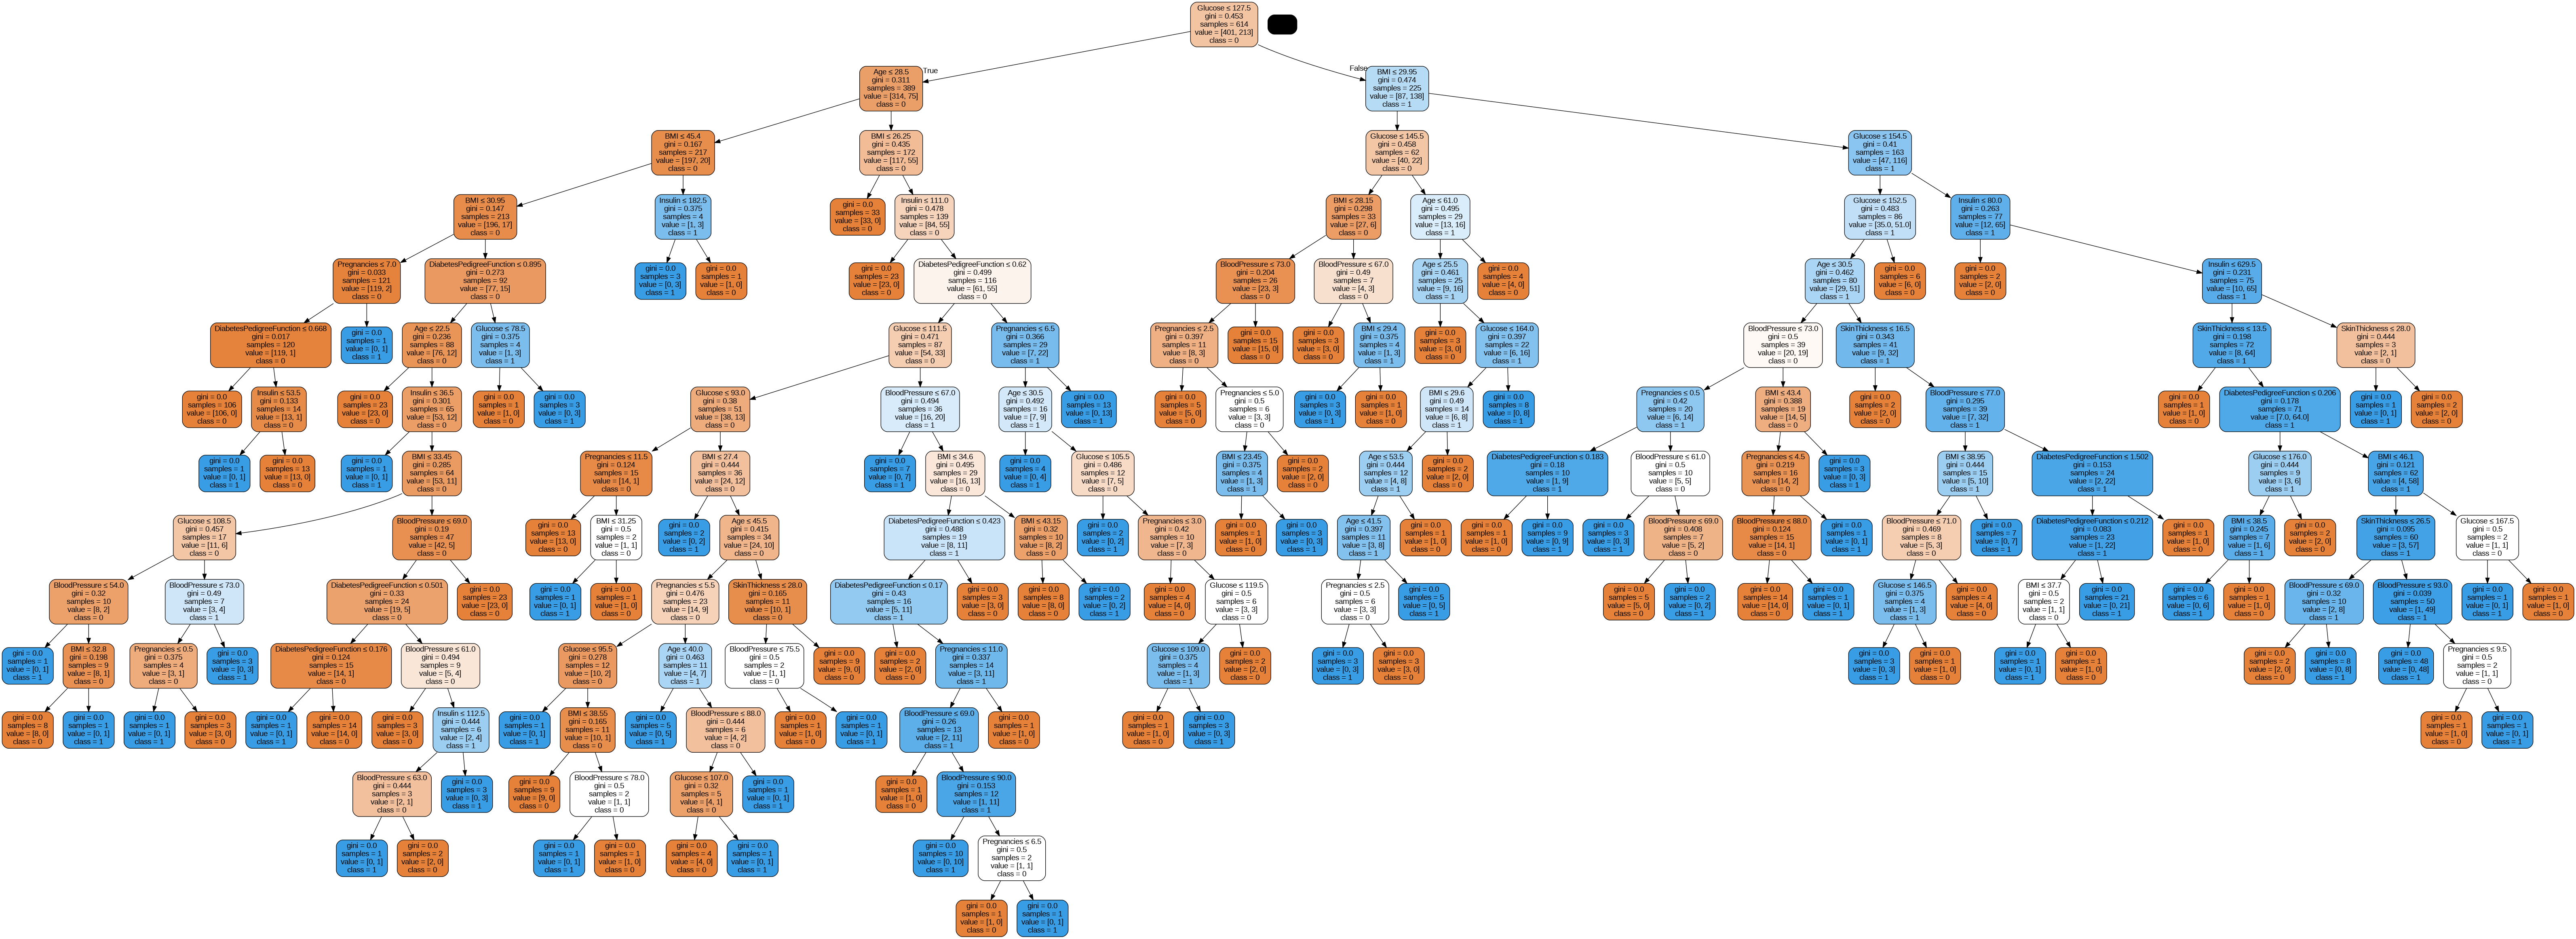

In [14]:
### Visualize the result
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [16]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

### Find the optimal hyperparameter tuning
param_dist = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

decision_tree = DecisionTreeClassifier(criterion="entropy")

## Use random search to find optimal hyperparameters
random_search = RandomizedSearchCV(decision_tree,
                                   param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy',
                                   random_state=42)

# Fit random search to the training data
random_search.fit(pima_X_train_processed, y_train)

## Best model for random forest
best_dt = random_search.best_estimator_
print("Optimal hyperparameters:", random_search.best_params_)

y_pred_best = best_dt.predict(pima_X_test_processed)

## Model Accuracy, how often is the classifier correct?
print("Accuracy of Decision Tree:",metrics.accuracy_score(y_test, y_pred))


Optimal hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 10}
Accuracy of Decision Tree: 0.7922077922077922


# Random Forest regressor model
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Goals:
*   Run Random forest with default
*  Run accuracy and cross validation
* Tune hyperparameters - max depth, n_estimator (no# of trees)
* Fit your model to parameter
* Run accuracy


Vist CL_regressor and answer, which model is more accurate for this dataset

### Random forest model
**Building Random Forest Model**  
Let's use a random forest classification with Scikit-learn. Random forests model can be used to solve regression (numeric variable) and classification (categorical variable). In random forest model, multiple decision trees are created using different random subsets of the data and features. Each decisiom tree is exposed to a different number of features and different sample of original data that it uses to classify the data to calculate its prediction.

`random_state` is a "seed" number for the random generator to ensure that the same training and test sets across different executions. The int value used does not matter.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from sklearn.model_selection import cross_val_score


### Random forest object
forest_reg = RandomForestRegressor(random_state=42) #default n_estimator is 100

## Run model
forest_reg.fit(pima_X_train_processed, y_train)
diabetes_predictions = forest_reg.predict(pima_X_test_processed)

## Evaluate the model with MSE
forest_mse = mean_squared_error(y_test, diabetes_predictions)
print("Random forest MSE:", forest_mse)
forest_rmse = np.sqrt(forest_mse)
print("Random forest RMSE:", forest_rmse)

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

### Visualize the results
for i in range(10):
  tree = forest_reg.estimators_[i]
  dot_data = export_graphviz(tree,
                  filled=True,
                  max_depth=3,
                  # rounded=True,
                  # special_characters=True,
                  feature_names = feature_cols,
                  class_names=['0','1'])
  graph = graphviz.Source(dot_data)
  graph.render(f"tree_{i}")
  display(graph)

**Hyperparameter Tuning**  
Using `RandomizedSearchCV`, we can define what hyperparamters to use. This function will randomly search parameters within a range per hyperparameter. We will look at using `n_estimators` to determine the number of decision trees in the forest and `max_depth` to determine the maximum depth of each decision tree in the forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

## Create a random forest classifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

## Use random search to find optimal hyperparameters
random_search = RandomizedSearchCV(rf,
                                   param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy',
                                   n_jobs=-1, random_state=42) #n_jobs=-1: use all available CPU cores

# Fit random search to the training data
random_search.fit(pima_X_train_processed, y_train)

## Best model for random forest
best_rf = random_search.best_estimator_
print("Optimal hyperparameters:", random_search.best_params_)

## Fit the best model to the testing data
y_pred_best = best_rf.predict(pima_X_test_processed)

## Re-evaluate the model with MSE
forest_mse_best = mean_squared_error(y_test, y_pred_best)
print("Random forest MSE with best model:", forest_mse_best)
forest_rmse_best = np.sqrt(forest_mse_best)
print("Random forest RMSE with best model:", forest_rmse_best)
forest_r2_best = r2_score(y_test, y_pred_best)
print("R-squared with best model:", forest_r2_best)
